In [ ]:
# Set Up and Load Dataset

In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv("data/diabetes_012_health_indicators_BRFSS2015.csv")
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# Descriptive Analysis (Descriptive Method)
# Using the summary statistics and visualizations to describe the dataset and identify trends / distributions

        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000  

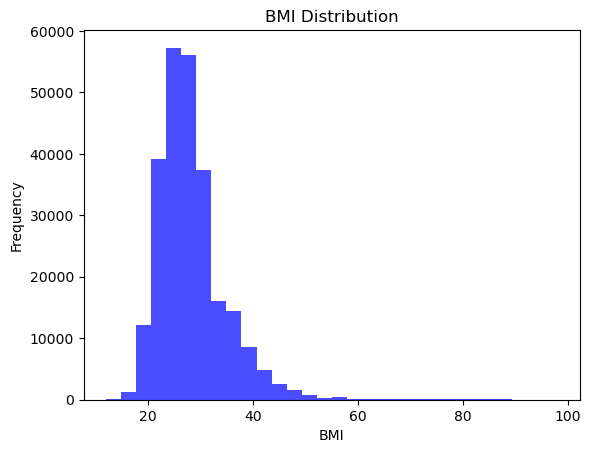

In [2]:
# Summary statistics
print(data.describe())

# Visualize BMI distribution
import matplotlib.pyplot as plt
plt.hist(data['BMI'], bins=30, color='blue', alpha=0.7)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [ ]:
### Dataset Wrangling and Preparation

In [3]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if necessary)
data = data.dropna()

print(data.columns)

# Normalize BMI
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply scaler to features
X = data.drop('Diabetes_012', axis=1)  # Features
y = data['Diabetes_012']  # Target

X_scaled = scaler.fit_transform(X)

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [15]:
# Predictive Analysis (Predictive Method)
# Pass the X_scaled dataset instead of unscaled X

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,     # Number of trees
    max_depth=None,       # Expand trees until all leaves are pure or until max depth
    random_state=42,      # Ensure reproducibility
    class_weight='balanced'  # Handle class imbalance
)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)
model = rf_model

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8382213812677389


In [ ]:
# Data Exploration and Visualization

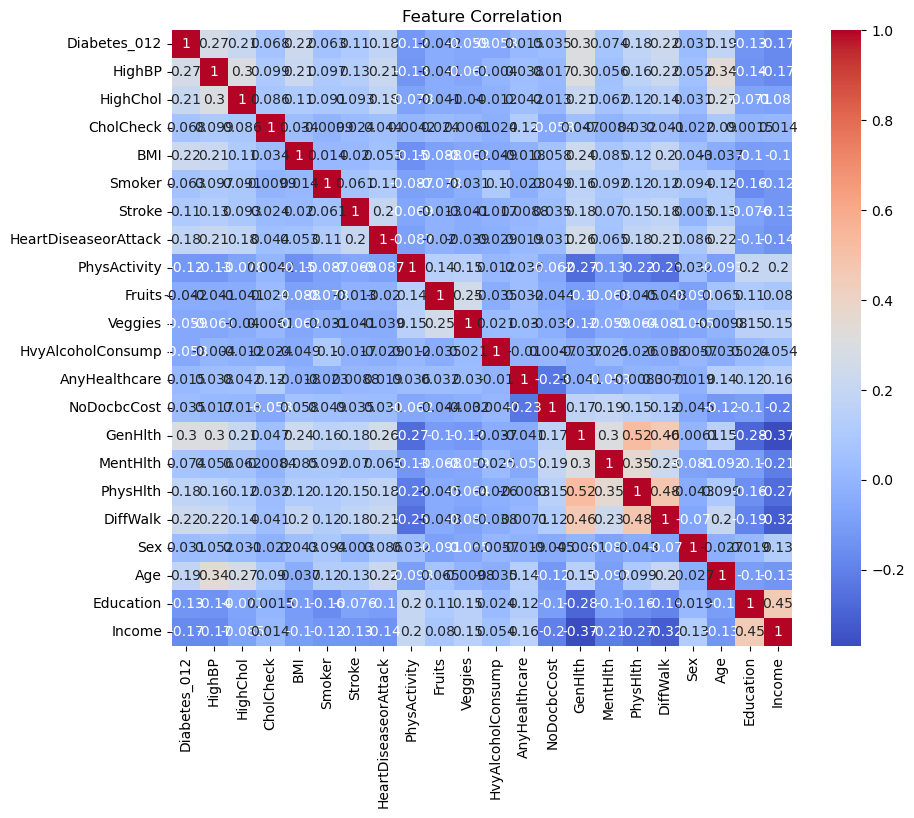

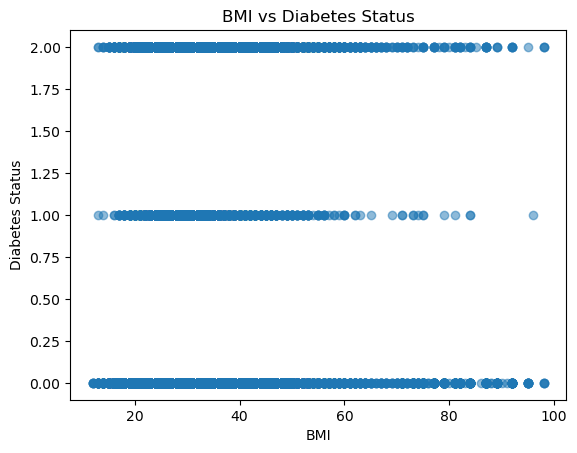

In [6]:
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# Scatter plot for BMI vs Diabetes
plt.scatter(data['BMI'], data['Diabetes_012'], alpha=0.5)
plt.title('BMI vs Diabetes Status')
plt.xlabel('BMI')
plt.ylabel('Diabetes Status')
plt.show()

In [5]:
# Interactive Queries

In [7]:
import ipywidgets as widgets
from IPython.display import display

# Create widgets for each feature
feature_inputs = {
    "HighBP": widgets.ToggleButtons(options=[0, 1], description="HighBP:"),
    "HighChol": widgets.ToggleButtons(options=[0, 1], description="HighChol:"),
    "CholCheck": widgets.ToggleButtons(options=[0, 1], description="CholCheck:"),
    "BMI": widgets.FloatSlider(min=10, max=50, step=0.1, value=25, description="BMI:"),
    "Smoker": widgets.ToggleButtons(options=[0, 1], description="Smoker:"),
    "Stroke": widgets.ToggleButtons(options=[0, 1], description="Stroke:"),
    "HeartDiseaseorAttack": widgets.ToggleButtons(options=[0, 1], description="Heart Disease:"),
    "PhysActivity": widgets.ToggleButtons(options=[0, 1], description="Physical Activity:"),
    "Fruits": widgets.ToggleButtons(options=[0, 1], description="Fruits:"),
    "Veggies": widgets.ToggleButtons(options=[0, 1], description="Veggies:"),
    "HvyAlcoholConsump": widgets.ToggleButtons(options=[0, 1], description="Heavy Alcohol:"),
    "AnyHealthcare": widgets.ToggleButtons(options=[0, 1], description="Healthcare Access:"),
    "NoDocbcCost": widgets.ToggleButtons(options=[0, 1], description="No Doctor (Cost):"),
    "GenHlth": widgets.IntSlider(min=1, max=5, step=1, value=3, description="General Health:"),
    "MentHlth": widgets.IntSlider(min=0, max=30, step=1, value=0, description="Mental Health Days:"),
    "PhysHlth": widgets.IntSlider(min=0, max=30, step=1, value=0, description="Physical Health Days:"),
    "DiffWalk": widgets.ToggleButtons(options=[0, 1], description="Difficulty Walking:"),
    "Sex": widgets.ToggleButtons(options=[0, 1], description="Sex (0=F, 1=M):"),
    "Age": widgets.IntSlider(min=1, max=13, step=1, value=9, description="Age Group:"),
    "Education": widgets.IntSlider(min=1, max=6, step=1, value=3, description="Education:"),
    "Income": widgets.IntSlider(min=1, max=8, step=1, value=3, description="Income Level:")
}

# Display all widgets
for widget in feature_inputs.values():
    display(widget)

# Function to collect inputs and predict
def predict_diabetes():
    user_data = [[widget.value for widget in feature_inputs.values()]]
    
    prediction = model.predict(user_data)  # Replace `model` with your trained model
    print(f"Prediction (0=No Diabetes, 1=Prediabetes, 2=Diabetes): {prediction[0]}")

# Button to trigger prediction
predict_button = widgets.Button(description="Predict")
predict_button.on_click(lambda x: predict_diabetes())
display(predict_button)

ToggleButtons(description='HighBP:', options=(0, 1), value=0)

ToggleButtons(description='HighChol:', options=(0, 1), value=0)

ToggleButtons(description='CholCheck:', options=(0, 1), value=0)

FloatSlider(value=25.0, description='BMI:', max=50.0, min=10.0)

ToggleButtons(description='Smoker:', options=(0, 1), value=0)

ToggleButtons(description='Stroke:', options=(0, 1), value=0)

ToggleButtons(description='Heart Disease:', options=(0, 1), value=0)

ToggleButtons(description='Physical Activity:', options=(0, 1), value=0)

ToggleButtons(description='Fruits:', options=(0, 1), value=0)

ToggleButtons(description='Veggies:', options=(0, 1), value=0)

ToggleButtons(description='Heavy Alcohol:', options=(0, 1), value=0)

ToggleButtons(description='Healthcare Access:', options=(0, 1), value=0)

ToggleButtons(description='No Doctor (Cost):', options=(0, 1), value=0)

IntSlider(value=3, description='General Health:', max=5, min=1)

IntSlider(value=0, description='Mental Health Days:', max=30)

IntSlider(value=0, description='Physical Health Days:', max=30)

ToggleButtons(description='Difficulty Walking:', options=(0, 1), value=0)

ToggleButtons(description='Sex (0=F, 1=M):', options=(0, 1), value=0)

IntSlider(value=9, description='Age Group:', max=13, min=1)

IntSlider(value=3, description='Education:', max=6, min=1)

IntSlider(value=3, description='Income Level:', max=8, min=1)

Button(description='Predict', style=ButtonStyle())

In [ ]:
# Evaluate Model Accuracy

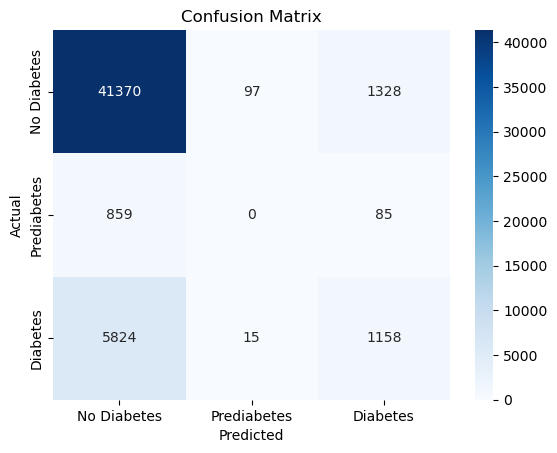

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.45      0.17      0.24      6997

    accuracy                           0.84     50736
   macro avg       0.44      0.38      0.38     50736
weighted avg       0.79      0.84      0.80     50736

Accuracy: 0.8382213812677389


In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = rf_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Accuracy Score
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
# Implement Monitor Logs

In [ ]:
import logging

# Configure logging
logging.basicConfig(filename='logs/model_predictions.log', level=logging.INFO)

# Function to log predictions
def log_prediction(input_data, prediction):
    logging.info(f"Input: {input_data}, Prediction: {prediction}")

# Example: Logging a prediction with diabetes
user_data = [[1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0]] # Example input (No diabetes)
# Convert to DataFrame and scale
user_data_df = pd.DataFrame(user_data, columns=X.columns)  # Align columns
user_data_scaled = scaler.transform(user_data_df)  # Scale data
prediction = rf_model.predict(user_data_scaled)
log_prediction(user_data_scaled.tolist(), prediction.tolist())